## generating depth map

In [1]:
import torch
import torchvision.transforms as transforms
from torchvision.models import mobilenet_v2
from torchvision.models.detection import transform


In [2]:
# Load the pretrained MiDaS model
midas = torch.hub.load("intel-isl/MiDaS", "MiDaS")

# Set the model to evaluation mode
midas.eval()



Using cache found in /home/dkuwarbi/.cache/torch/hub/intel-isl_MiDaS_master


Loading weights:  None


Downloading: "https://github.com/facebookresearch/WSL-Images/archive/main.zip" to /home/dkuwarbi/.cache/torch/hub/main.zip
Downloading: "https://download.pytorch.org/models/ig_resnext101_32x8-c38310e5.pth" to /home/dkuwarbi/.cache/torch/hub/checkpoints/ig_resnext101_32x8-c38310e5.pth


  0%|          | 0.00/340M [00:00<?, ?B/s]

Downloading: "https://github.com/isl-org/MiDaS/releases/download/v2_1/midas_v21_384.pt" to /home/dkuwarbi/.cache/torch/hub/checkpoints/midas_v21_384.pt


  0%|          | 0.00/403M [00:00<?, ?B/s]

MidasNet(
  (pretrained): Module(
    (layer1): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inpla

In [3]:
from PIL import Image

In [4]:
 import matplotlib.pyplot as plt

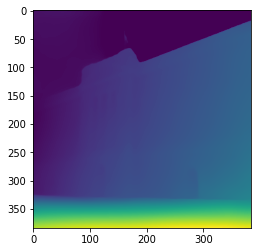

In [5]:
import torch
import torchvision.transforms as transforms
from PIL import Image

# # Load the pretrained MiDaS model
# midas = torch.hub.load("intel-isl/MiDaS", "MiDaS")

# # Set the model to evaluation mode
# midas.eval()

# Load and preprocess the image
image_path = "./01973449_5848775157.jpg"
img = Image.open(image_path).convert("RGB")
img_transform = transforms.Compose([
    transforms.Resize((384, 384)),  # Resize the image to match MiDaS input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # ImageNet normalization
])
img = img_transform(img).unsqueeze(0)

# Generate the depth map
with torch.no_grad():
    prediction = midas(img)

# Display the depth map
plt.imshow(prediction[0], cmap="viridis")
plt.show()


In [6]:
import numpy as np

# Load the depth map
depth_map = prediction[0].numpy()

# Define a scaling factor to control the displacement strength
scaling_factor = 0.1

# Generate a 3D displacement map based on the depth map
displacement_map = np.zeros((depth_map.shape[0], depth_map.shape[1], 3))
for i in range(depth_map.shape[0]):
    for j in range(depth_map.shape[1]):
        depth_value = depth_map[i, j]
        displacement_map[i, j, 2] = depth_value * scaling_factor  # Z-coordinate (displacement)
        
# Visualize the 3D displacement map (you might need a 3D visualization library)
# ...

# You can now use the displacement map to apply a 3D transformation to your original image
# ...


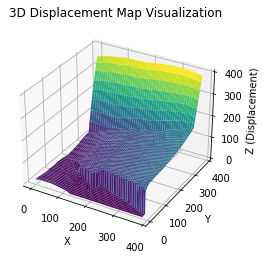

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the displacement map
# displacement_map = ...  # Your displacement map data here

# Create a grid of coordinates
x, y = np.meshgrid(np.arange(displacement_map.shape[1]), np.arange(displacement_map.shape[0]))
z = displacement_map[:, :, 2]  # Use the Z-coordinate from the displacement map

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D displacement map
ax.plot_surface(x, y, z, cmap='viridis')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z (Displacement)')
ax.set_title('3D Displacement Map Visualization')

# Show the plot
plt.show()


In [ ]:
# import cv2
# import numpy as np

# # Load the original image and depth map
# original_image = cv2.imread('./01973449_5848775157.jpg')
# # depth_map = cv2.imread('path_to_depth_map.png', cv2.IMREAD_GRAYSCALE)  # Grayscale depth map

# # Define the parameters (adjust as needed)
# new_view_width = 800
# new_view_height = 600
# focal_length = 1000  # Focal length in pixels (adjust based on your data)
# baseline = 1.0      # Stereo baseline in arbitrary units (adjust based on your data)

# # Initialize the new view
# new_view = np.zeros((new_view_height, new_view_width, 3), dtype=np.uint8)

# # Iterate through pixels in the new view
# for y in range(new_view_height):
#     for x in range(new_view_width):
#         # Calculate depth value from the depth map
#         depth_value = depth_map[y, x] / 255.0  # Normalize depth to [0, 1]
        
#         # Handle division by zero or invalid depth values
#         try:
#             depth = baseline * focal_length / depth_value
#         except ZeroDivisionError:
#             # Handle division by zero gracefully (you might want to use a default depth value)
#             depth = 1.0  # Default depth value

#         # Calculate the corresponding pixel coordinates in the original image
#         original_x = int(x - depth * baseline / focal_length)
#         original_y = y
        
#         # Copy the pixel from the original image to the new view
#         if 0 <= original_x < original_image.shape[1]:
#             new_view[y, x] = original_image[original_y, original_x]

# # Display the synthesized new view
# cv2.imshow('Synthesized View', new_view)
# cv2.waitKey(0)
# cv2.destroyAllWindows()



## nerf

In [ ]:
## new approach

In [ ]:
# !pip install tk-tools

In [ ]:
# !pip install open3d
# !pip install tkinter

In [8]:
import matplotlib
matplotlib.use('TkAgg')
from matplotlib import pyplot as plt
from PIL import Image
import torch
from transformers import GLPNImageProcessor, GLPNForDepthEstimation


feature_extractor = GLPNImageProcessor.from_pretrained("vinvino02/glpn-nyu")
model = GLPNForDepthEstimation.from_pretrained("vinvino02/glpn-nyu")

# load and resize the input image
image = Image.open("./01973449_5848775157.jpg")
new_height = 480 if image.height > 480 else image.height
new_height -= (new_height % 32)
new_width = int(new_height * image.width / image.height)
diff = new_width % 32
new_width = new_width - diff if diff < 16 else new_width + 32 - diff
new_size = (new_width, new_height)
image = image.resize(new_size)

# prepare image for the model
inputs = feature_extractor(images=image, return_tensors="pt")

# get the prediction from the model
with torch.no_grad():
    outputs = model(**inputs)
    predicted_depth = outputs.predicted_depth

# remove borders
pad = 16
output = predicted_depth.squeeze().cpu().numpy() * 1000.0
output = output[pad:-pad, pad:-pad]
image = image.crop((pad, pad, image.width - pad, image.height - pad))

# visualize the prediction
fig, ax = plt.subplots(1, 2)
ax[0].imshow(image)
ax[0].tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
ax[1].imshow(output, cmap='plasma')
ax[1].tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
plt.tight_layout()
plt.pause(5)


ModuleNotFoundError: No module named 'tkinter'